IPR on one of the edge site: 0.07577922650454069


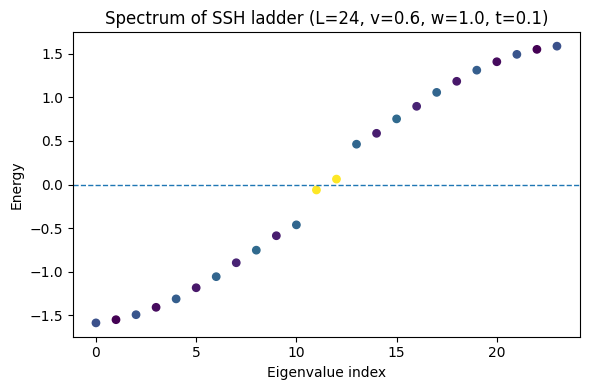

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def build_real_space_H(L, v, w, t):
    H = np.zeros((L, L), dtype=complex)
    def add_hop(i, j, amp):
        # print(amp, i, j)
        H[i, j] -= amp
        H[j, i] -= np.conjugate(amp)

    # v and w terms
    for j in range(L-1):
        if j % 2 == 0:
            add_hop(j, j+1, v)
        else:
            add_hop(j, j+1, w) 

    add_hop(0, L - 1, t)

    return H


def edge_weight(evecs, L):
    edge_sites = np.array([0, L//2 - 1, L//2, L - 1])
    probs = np.abs(evecs[edge_sites, :])**2
    return probs.sum(axis=0)

L, v, w, t = 24, 0.6, 1., 0.1
H = build_real_space_H(L, v, w, t)
E, V = np.linalg.eigh(H)

ew = edge_weight(V, L)

IPR = np.sum(np.abs(V[L//2,:])**4, axis=0)
print("IPR on one of the edge site:", IPR)

plt.figure(figsize=(6,4))
plt.scatter(np.arange(L), E, c=ew, s=28)
#plt.colorbar()
plt.axhline(0, ls='--', lw=1)
plt.title("Spectrum of SSH ladder" + f" (L={L}, v={v}, w={w}, t={t})")
plt.xlabel("Eigenvalue index")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

In [8]:
# TODO: Run an experiment keeping v/w fixed and varying t. See how the edge states evolve. Basically store E[L//2] as a function of t. Plot that.

w = 1.0
v = 0.6
L = 24
ts = np.logspace(-2.1,0.5, 200, base=10)

mid_energies = []
for t in ts:
    E, _ = np.linalg.eigh(build_real_space_H(L, v, w, t))
    mid_energies.append(E[L//2])


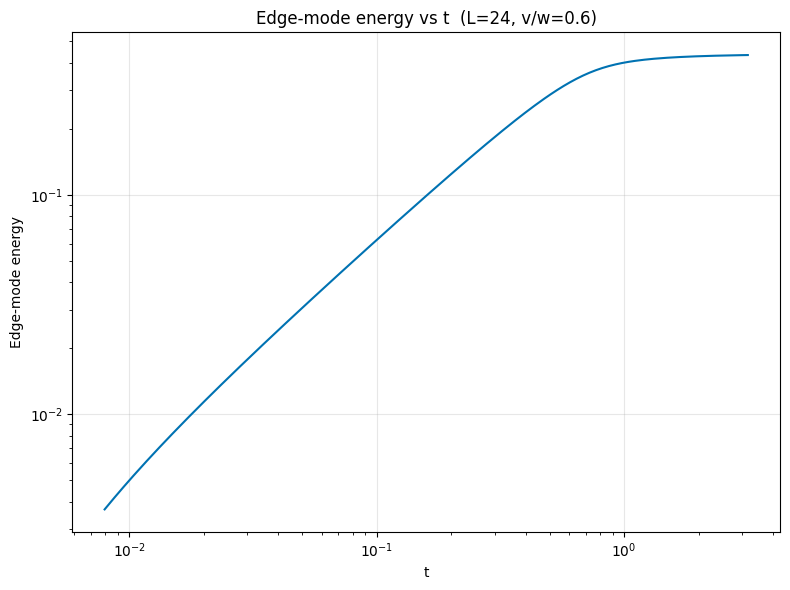

In [22]:
plt.figure(figsize=(8, 6))
plt.loglog(ts, mid_energies, color="#0072b2")
plt.axhline(0, ls="--", lw=0.8, color="k")
plt.xlabel("t")
plt.ylabel("Edge-mode energy")
plt.title("Edge-mode energy vs t  (L=24, v/w=0.6)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Hamiltonian for SSH Ladder (L=24, v=0.6, w=1.0, t=3.1622776601683795)')

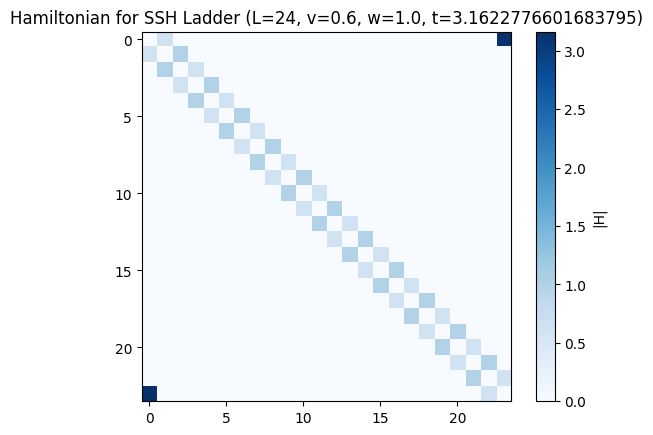

In [10]:
plt.imshow(np.abs(build_real_space_H(L, v, w, t)), cmap='Blues')
plt.colorbar(label='|H|')
plt.title("Hamiltonian for SSH Ladder" + f" (L={L}, v={v}, w={w}, t={t})")

In [11]:
# Compute overlap between the perfect t=0 edge modes and the
# eigenstates that remain closest to zero energy for different t values.

def edge_mode_indices(E):
    return np.argsort(np.abs(E))[:2]

E0, V0 = np.linalg.eigh(build_real_space_H(L, v, w, 0.0))
edge_mode_idx = edge_mode_indices(E0)
perfect_edge_modes = V0[:, edge_mode_idx]

edge_mode_overlaps = []
for t in ts:
    E_t, V_t = np.linalg.eigh(build_real_space_H(L, v, w, t))
    idx_t = edge_mode_indices(E_t)
    overlap_matrix = np.abs(perfect_edge_modes.conj().T @ V_t[:, idx_t])**2
    edge_mode_overlaps.append(np.max(overlap_matrix))

edge_mode_overlaps = np.vstack(edge_mode_overlaps)


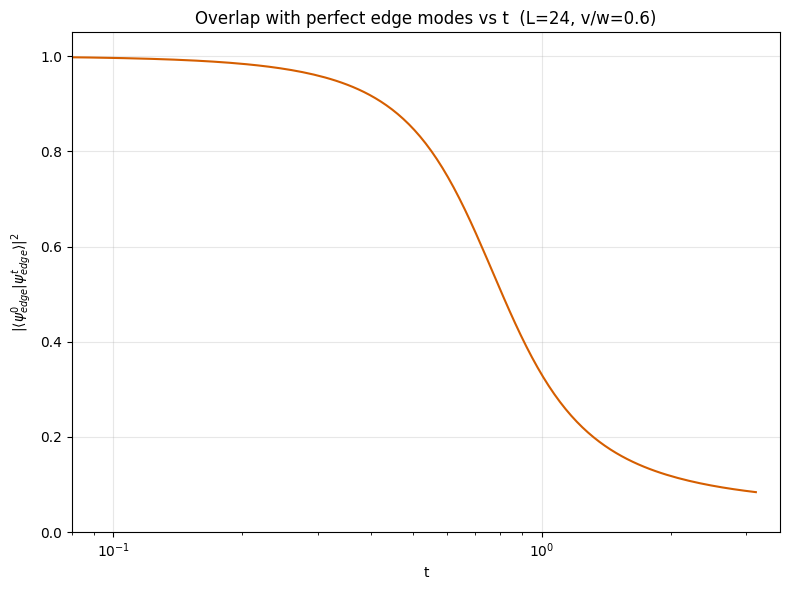

In [21]:
plt.figure(figsize=(8, 6))
plt.semilogx(ts, edge_mode_overlaps, color='#d55e00')
plt.ylim(0, 1.05)
plt.xlabel('t')
plt.ylabel(r'$|\langle \psi_{edge}^0|\psi_{edge}^t \rangle|^2$')
plt.title('Overlap with perfect edge modes vs t  (L=24, v/w=0.6)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.xlim((0.08, 3.6))
plt.show()